In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from UncorrelatedFBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 5 * 10**3
lr = 1e-4

In [4]:
model.load_model("models/100DCallOption1.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 29700, Loss: 2.515e+02, Y0: 5.182, Time: 15.65, Learning Rate: 1.000e-04
It: 29800, Loss: 1.693e+02, Y0: 5.147, Time: 67.74, Learning Rate: 1.000e-04
It: 29900, Loss: 1.595e+02, Y0: 5.151, Time: 69.12, Learning Rate: 1.000e-04
It: 30000, Loss: 2.004e+02, Y0: 5.087, Time: 69.41, Learning Rate: 1.000e-04
It: 30100, Loss: 1.890e+02, Y0: 5.158, Time: 69.42, Learning Rate: 1.000e-04
It: 30200, Loss: 2.003e+02, Y0: 5.110, Time: 69.10, Learning Rate: 1.000e-04
It: 30300, Loss: 1.939e+02, Y0: 5.163, Time: 68.64, Learning Rate: 1.000e-04
It: 30400, Loss: 1.954e+02, Y0: 5.149, Time: 68.46, Learning Rate: 1.000e-04
It: 30500, Loss: 1.957e+02, Y0: 5.043, Time: 68.77, Learning Rate: 1.000e-04
It: 30600, Loss: 2.047e+02, Y0: 5.063, Time: 68.73, Learning Rate: 1.000e-04
It: 30700, Loss: 2.562e+02, Y0: 5.076, Time: 68.67, Learning Rate: 1.000e-04
It: 30800, Loss: 2.236e+02, Y0: 5.065, Time: 67.98, Learning Rate: 1.000e-04
It: 30900, Loss: 2.094e+02, Y0: 5.077, Time: 68.27, Learning Rate: 1.

In [6]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [7]:
graph = model.iteration, model.training_loss

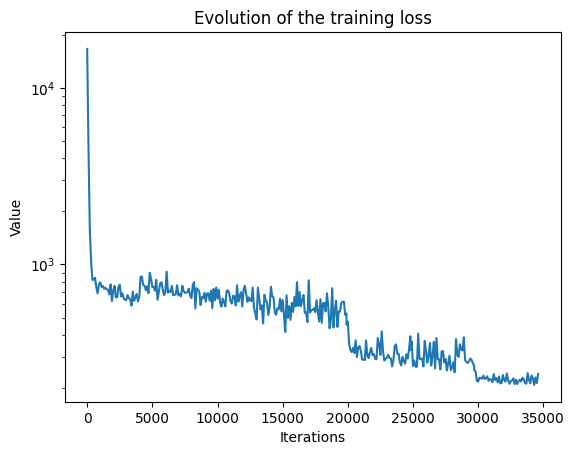

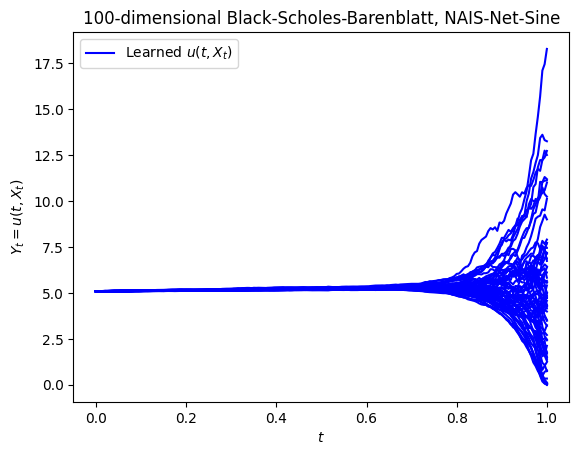

In [8]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [9]:
Y_pred.shape

(8192, 201, 1)

In [10]:
Y_preds = Y_pred.reshape(8192, 201)

In [11]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [12]:
r = 0.05

In [13]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.088597 , 5.0894384, 5.0901055, 5.090507 , 5.0906196, 5.0905704,
       5.090341 , 5.089916 , 5.0895514, 5.089242 , 5.0891156, 5.0891795,
       5.089439 , 5.0899043, 5.090504 , 5.091289 , 5.0921216, 5.0929914,
       5.093719 , 5.094365 , 5.0947824, 5.0950594, 5.09516  , 5.0951705,
       5.095058 , 5.094868 , 5.0946836, 5.0944476, 5.0943527, 5.0942492,
       5.0942492, 5.0942144, 5.0941906, 5.0942097, 5.0941706, 5.0941486,
       5.094054 , 5.093915 , 5.0937057, 5.093386 , 5.0930505, 5.0925426,
       5.092023 , 5.091455 , 5.0907655, 5.0901213, 5.089489 , 5.0889077,
       5.088497 , 5.0881944, 5.0879774, 5.0879283, 5.0880733, 5.088245 ,
       5.088506 , 5.0888667, 5.089235 , 5.089648 , 5.089971 , 5.0902557,
       5.090509 , 5.0907717, 5.0908523, 5.0909996, 5.0911326, 5.0911956,
       5.091235 , 5.091332 , 5.0913653, 5.0914516, 5.0915275, 5.0916386,
       5.0918007, 5.0921016, 5.092388 , 5.092736 , 5.093061 , 5.0934577,
       5.0938115, 5.094137 , 5.094408 , 5.0944543, 

In [14]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [15]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[20000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([20000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([20000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [16]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 200]

In [17]:
mc_price

array([[5.12781608]])

In [18]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

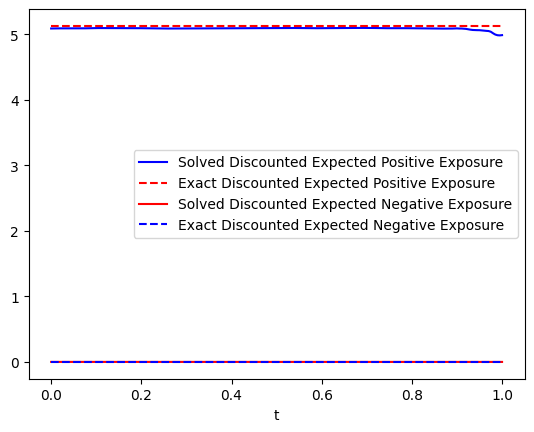

In [19]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [20]:
model.save_model("models/100DCallOption.pth")